# Healthcare Workers and Burnout during Covid-19
This project focuses on healthcare worker burnout, which was described by the U.S. Department of Health and Human Services as a high degree of emotional exhaustion and a low sense of personal accomplishment at work. The effects of healthcare worker burnout are far-reaching from personal injury and illness all the way up to the worsening of societal health as patient care can suffer and workers leave the field. Prior to COVID-19, the National Academy of Medicine determined Healthcare worker burnout to be at “crisis levels” with 35-54% of nurses and doctors reporting symptoms of burnout. As we work through our analysis today, we will see how those numbers might be different now. In this project we are using a 2021 survey measuring the burnout of healthcare workers as it relates to COVID-19. Our analysis evaluates the prevalence of burnout by occupation, career stage, workload, and demographic characteristics. We also investigated key contributing factors to burnout and how support measures enacted by the workplace affected burnout.

# Data Cleaning
### The data cleaning process we used was straightforward. 

1.	Eliminating columns we did not need. 
    a.	This was done in the CSV itself. We listed out the columns in our dataset that would not be useful to the overall project and deleted them. There was no formula used for this, we deleted the columns in the main CSV itself. 
    
2.	Transforming data so we could use it. 
    a.	The values in some columns were not useful. For example, the date column listed date, time, and time zone all within one cell when we only needed the date. 
    
3.	Getting rid of blank cells and spaces. 
    a.	Lastly, we eliminated blank cells and spaces at the end of values. For blank cells we used the following process: “Find & Select” , “Go to special” , then “blanks”
    b.	For cells with spaces, we used a TRIM formula. TRIM allowed us to keep the values in the cells we wanted but get rid of the extra space at the end so JupyerNotebook could read the values. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import scipy.stats as st
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
main_file = "Burn-Out-Questionnaire-cleaned-5.csv"
burnout_df = pd.read_csv(main_file)

# (1) Age vs overall burnout score

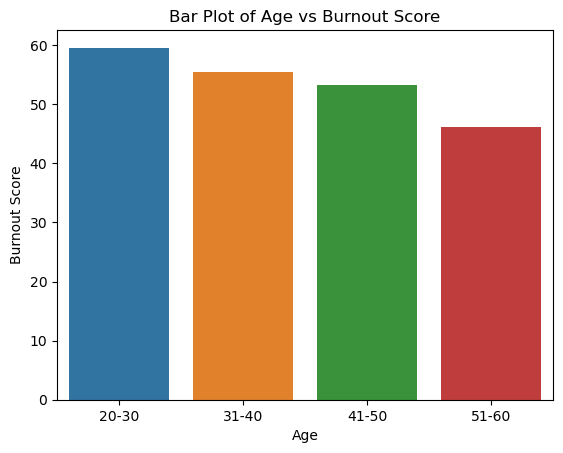

In [45]:
# Create a bar plot
ax = sns.barplot(x='Age', y='Overall Average', data=burnout_df, errorbar=None)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Burnout Score')
plt.title('Bar Plot of Age vs Burnout Score')

# Modify the x-axis labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['20-30', '31-40', '41-50', '51-60'])

# Display the plot
plt.show()

### Description
This bar plot shows the correlation between Age and Burnout. This graph indicates that the older someone is, the less burntout they report to be. There can be a variety of explanations for this, older workers may have more senior roles, or more comfortable roles, older people are also more experienced in their fields.

# (2) DEMOGRAPHICS
The staff of the hospital is overwhelmingly comprised of female staff and predominantly of the medical sections (Nurse and Doctors)

## (2.1) Distribution of all Healthcare Workers

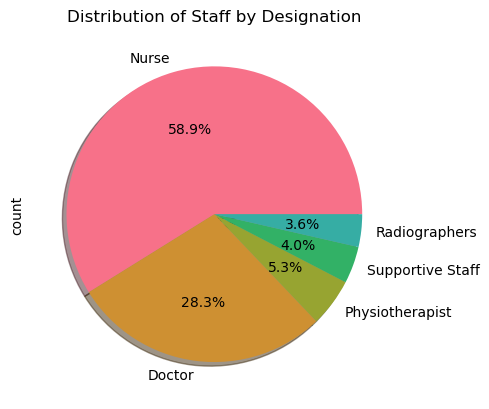

In [3]:
colors = sns.color_palette("husl", 8)
pie_df = burnout_df['Designation'].value_counts()
this_plot = pie_df.plot.pie(title="Distribution of Staff by Designation", legend=False,
                   autopct='%1.1f%%', colors=colors, textprops=dict(color="k"),
                   shadow=True, startangle=0)
plt.show()
del(pie_df)

### Description
From this pie-chart, the majority of the healthcare workers are nurses who make up 58.9% of all healthcare workers.

## (2.2) Distribution of Staff by Gender

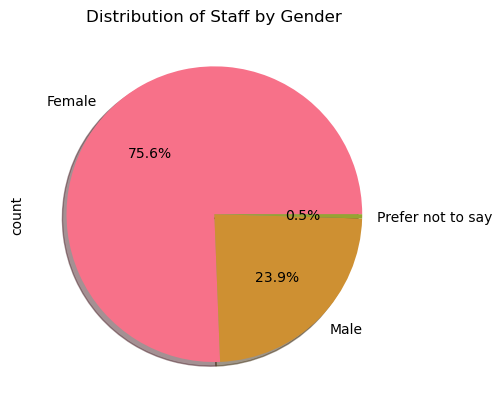

In [4]:
colors = sns.color_palette("husl", 8)
pie_df = burnout_df['Gender'].value_counts()
this_plot = pie_df.plot.pie(title="Distribution of Staff by Gender", legend=False,
                   autopct='%1.1f%%', colors=colors, textprops=dict(color="k"),
                   shadow=True, startangle=0)
plt.show()
del(pie_df)

### Description
The analysis shows that the healthcare workers are overwhelmingly female who comprise more that 75% of healthcare workers.

## (2.3) Burnout of Healthcare Workers by Gender

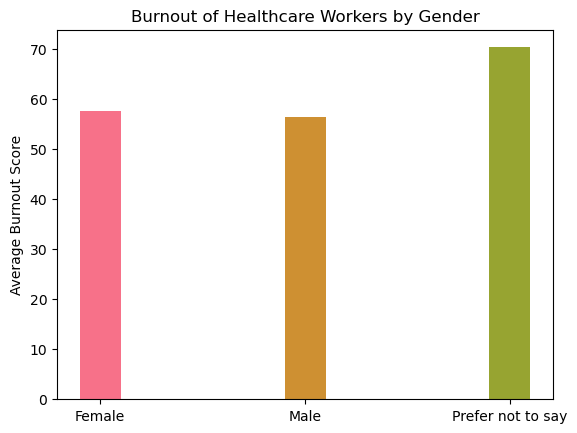

In [5]:
health_care_analysis_burnout_sex_df = burnout_df.copy()
health_care_analysis_burnout_by_gender_df = health_care_analysis_burnout_sex_df.groupby('Gender').mean(numeric_only=True)
this_dict = health_care_analysis_burnout_by_gender_df['Overall Average'].to_dict()
colors = sns.color_palette("husl", 8)
fig, ax = plt.subplots()
plt.bar(this_dict.keys(),
        height=this_dict.values(),
        color=colors,
        width=0.2,
        # align='edge',

        )


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Burnout Score')
ax.set_title('Burnout of Healthcare Workers by Gender')


plt.show()

### Description
From the bar graph, the burnout for both male and female are generally burnt out the same.

## (2.4) Visualizing the level of Burnout by the 3 Domains

In [6]:
final_df = burnout_df.copy().groupby('Designation')[['Domain 1', 'Domain 2', 'Domain 3']].mean(numeric_only=True)
final_df.rename(columns={'Domain 1':'Personal', 'Domain 2':'Work Related', 'Domain 3': 'Client Related' }, inplace=True)

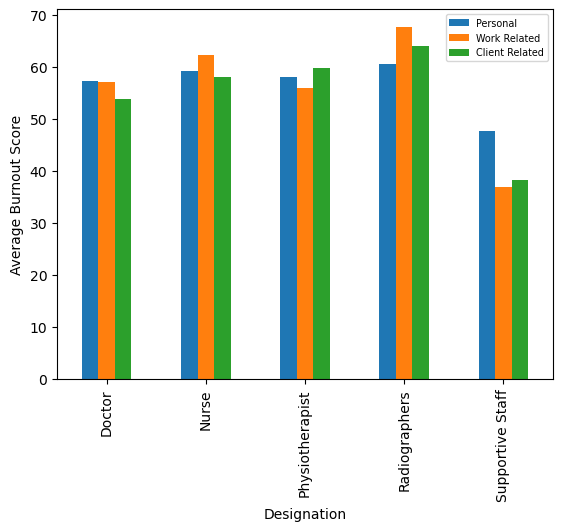

In [7]:
final_df.plot(kind='bar')
plt.legend(fontsize='x-small')
plt.ylabel('Average Burnout Score')
plt.show()

### Description
This graph show that all three factors generally lead to burnout among the healthcare workers. However, the level of burnout among Radiographers is mainly work-related.

In [8]:
final_df

,Personal,Work Related,Client Related
Designation,,,
Doctor,57.258242,56.961538,53.802198
Nurse,59.142480,62.279683,58.015831
Physiotherapist,58.088235,55.911765,59.647059
Radiographers,60.434783,67.652174,63.956522
Supportive Staff,47.692308,36.884615,38.307692


# (3.1) Boxplots of Overall Average Score by Designation

In [9]:
# Assuming 'designation' is the correct column name and 'average_score' is the correct column name for 'BV'
designations = ['Nurse', 'Doctor', 'Radiographers', 'Physiotherapist', 'Supportive Staff', 'Minor Staff', 'Bio medical engineering']
df_filtered = burnout_df[burnout_df['Designation'].isin(designations)]

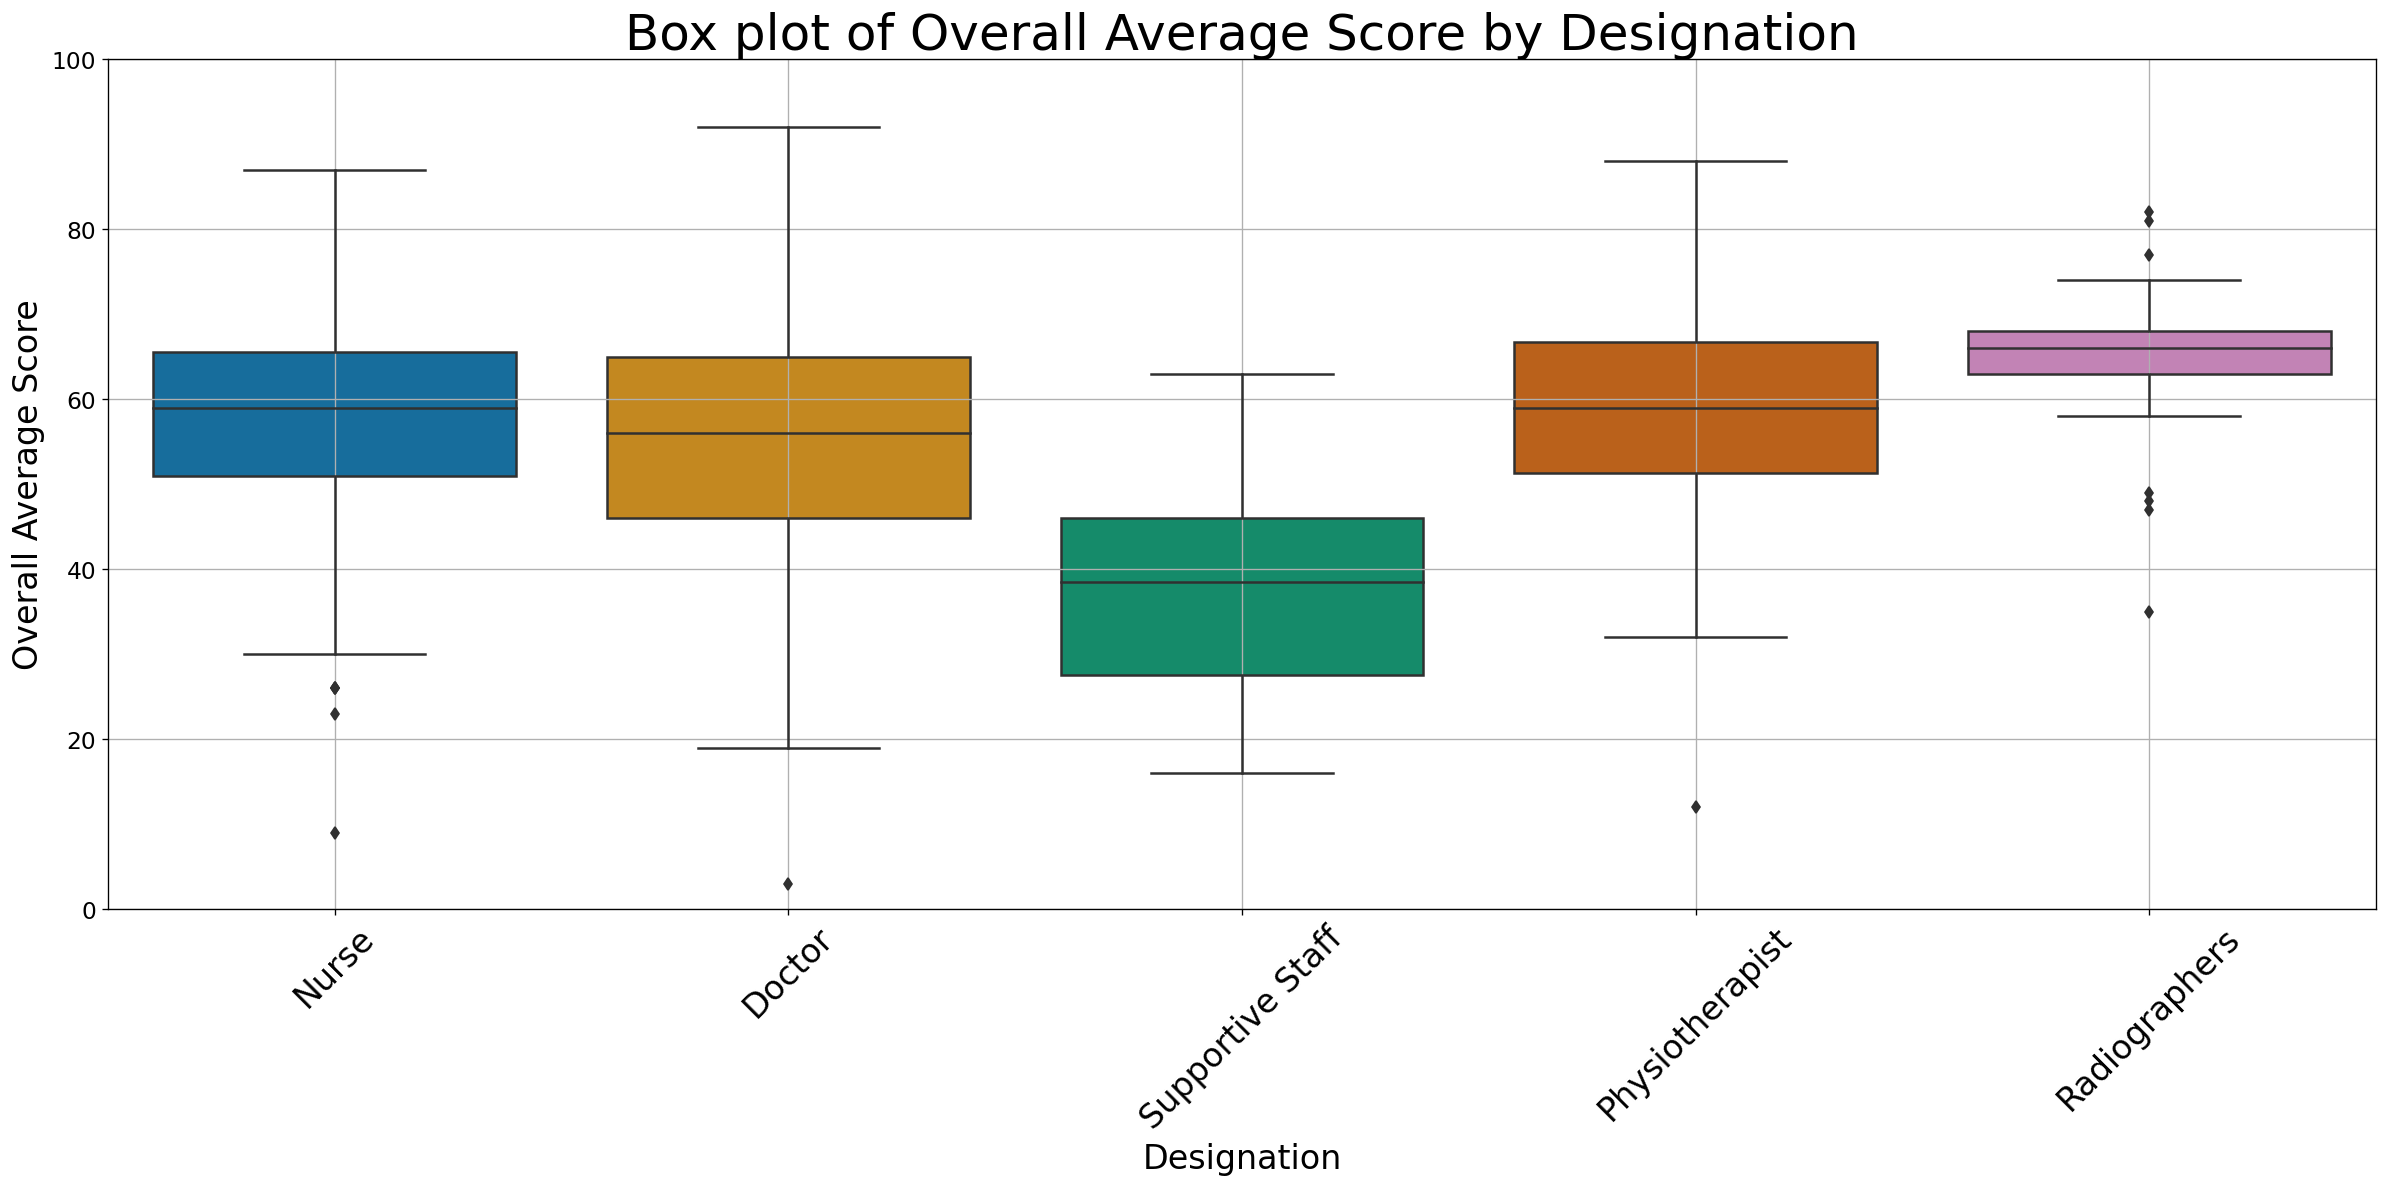

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10), dpi=120) 
sns.boxplot(x='Designation', y='Overall Average', data=df_filtered, 
            palette="colorblind", 
            width=0.8)  

plt.title('Box plot of Overall Average Score by Designation', fontsize=30)
plt.xlabel('Designation', fontsize=20)
plt.ylabel('Overall Average Score', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=14)
plt.grid(True)  

plt.ylim(0, 100)  

plt.ylim(auto=True)

plt.tight_layout()
plt.show()

# Box plot of Overall Average Scorge by Designation
## Description and Analysis
This box plot displays the distribution of overall average scores for designations within an organization. The scores are measured on a scale from 0 to 100, where a higher score denotes workers having better performance during Covid-19. The "whiskers" on either end of the box extend to cover the full range of the data, discounting any potential outliers which are indicated by separate points. Based on these findings we know Radiographers have the highest median score and least variability, suggesting consistent performance amongst high burnout responses, but with some outliers at both ends which suggest some exceptions. Nurses and Physiotherapist share similair medians and ranges suggesting similiar burnout performance measures amongst the two designations. Doctors despite having the widest range of scores indicating diverse outcomes, have the third highest median, showing thye perform well under covid-19 scenario. Lastly supportive staff has the lowest median and high variability with scores consistently on the lower end, suggesting low burnout rates as well.

# (3.2) The 5 highest and lowest Scoring Survey Questions

In [11]:
#Score Ranges
score_columns = ['Score'] + [f'Score.{i}' for i in range(1, 26)]

In [12]:
# List with corresponding questions
question_texts = []
for score_col in score_columns:
    score_index = burnout_df.columns.get_loc(score_col)
    question_text = burnout_df.columns[score_index - 1]
    question_texts.append(question_text)

In [13]:
# Replace non-numeric values with NaN and calculate the total score
burnout_df[score_columns] = burnout_df[score_columns].apply(pd.to_numeric, errors='coerce')
total_scores = burnout_df[score_columns].sum()

In [14]:
# Create a DataFrame question text and the total score
score_df = pd.DataFrame({'Question': question_texts, 'TotalScore': total_scores.values})

In [15]:
# Sort top 5 questions by total score
top_5_scores = score_df.nlargest(5, 'TotalScore')

## (3.3) Creating a Pie chart for highest 5 responses

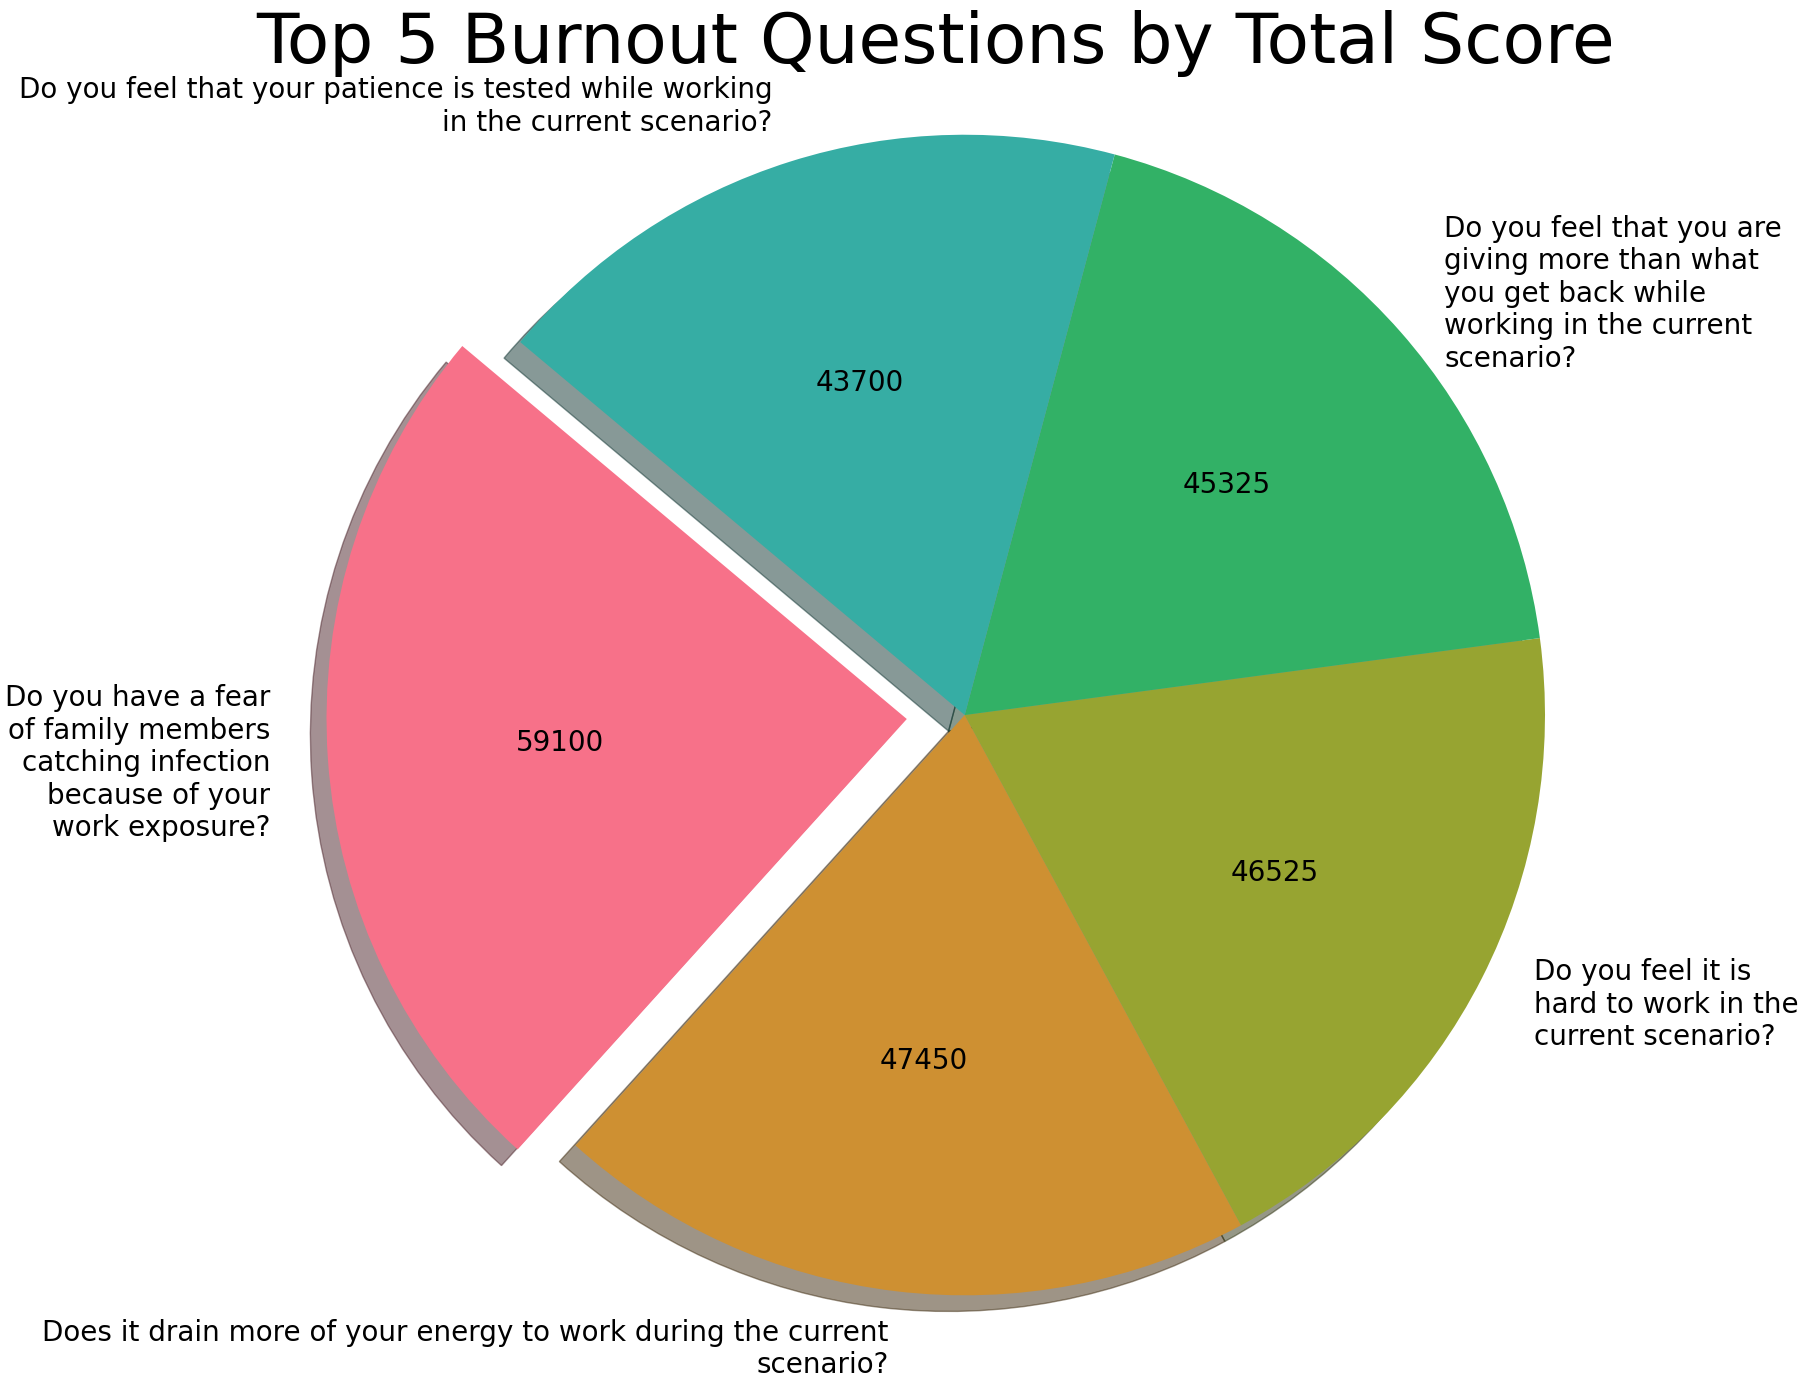

In [16]:
# Define a custom function for autopct to display absolute values
def absolute_value(val):
    a = round(val/100.*sum(top_5_scores['TotalScore']), 0)
    return int(a)

# Customizations
labels = [
    "Do you have a fear of family members catching infection because of your work exposure?",
    "Does it drain more of your energy to work during the current scenario?",
    "Do you feel it is hard to work in the current scenario?",
    "Do you feel that you are giving more than what you get back while working in the current scenario?",
    "Do you feel that your patience is tested while working in the current scenario?"
]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice 

# Figure size
plt.figure(figsize=(18, 14))  # Increase figure size

# Pie chart
plt.pie(
    top_5_scores['TotalScore'],
    colors=colors,
    labels=labels,
    autopct=absolute_value,  # Custom function used here
    startangle=140,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 20, 'wrap':True, 'rotation_mode': 'anchor'}
)

# Title and equal aspect ratio
plt.title('Top 5 Burnout Questions by Total Score', fontsize=50)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



plt.tight_layout()
plt.show()

### Description and Analysis
The findings from the pie chart reflecting top 5 burnout related questions for healthcare employees during Covid-19 express the following. The most prominent concern for causing burnout is the fear workers have for family members contracting infection due to exposure. This indicates burnout is not solely based on workload or work enviornment, but also from emotional burden and stress of loved ones. This pie chart also concludes that working during pandemic to be emotionally and physically draining. Workers are experiencing challenges based on volume of patients, new protocols, and stressful work environemnt. Lastly, workers are reporting a percieved lack of support and feel that their patience is being tested to the max. From these findings, we can find the an investment in Emotional support programs, worklife balance intitiaves, and adequate compensation and benefits could help reduce burnout.

## (3.4) Creating a Pie chart for lowest 5 responses

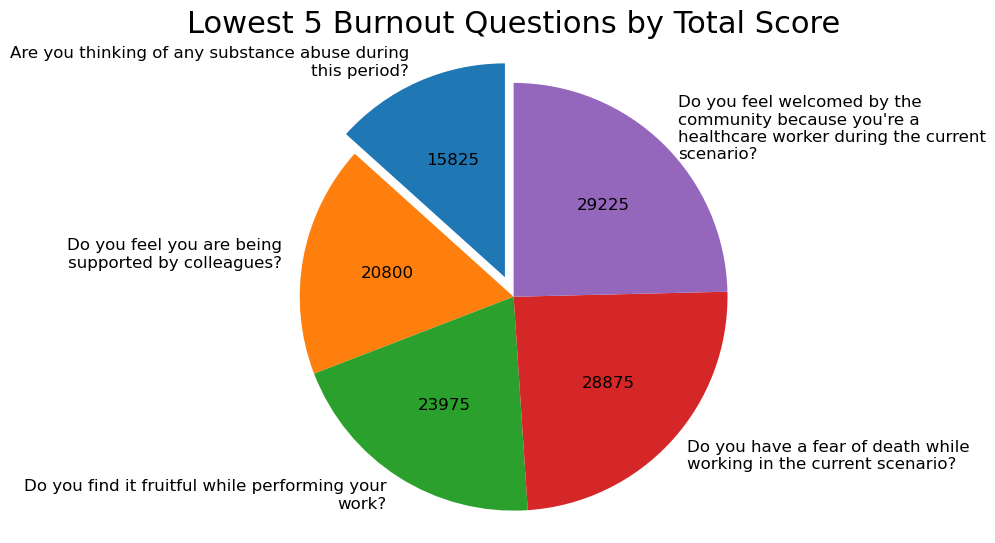

In [17]:
# Custom function to show the absolute count
def absolute_value(val, total):
    absolute = int(round(val/100.*total.sum()))
    return "{:d}".format(absolute)

# Sort to lowest 5 questions by total score percentage
lowest_5_scores = score_df.nsmallest(5, 'TotalScore')

# Calculate the total score to use in the custom autopct function
total_scores = lowest_5_scores['TotalScore'].sum()

# Plot the pie chart for the lowest 5 burnout questions
plt.figure(figsize=(10, 6))
plt.pie(
    lowest_5_scores['TotalScore'],
    labels=[
        "Are you thinking of any substance abuse during this period?",
        "Do you feel you are being supported by colleagues?",
        "Do you find it fruitful while performing your work?",
        "Do you have a fear of death while working in the current scenario?",
        "Do you feel welcomed by the community because you're a healthcare worker during the current scenario?"
    ],
    explode=(0.1, 0, 0, 0, 0),  # Only "explode" the 1st slice
    autopct=lambda val: absolute_value(val, lowest_5_scores['TotalScore']),  # Use custom function
    startangle=90,
    textprops={'fontsize': 12, 'wrap':True, 'rotation_mode': 'anchor'}
)
plt.title('Lowest 5 Burnout Questions by Total Score', fontsize=22)
plt.axis('equal')

plt.subplots_adjust(top=0.93) 

plt.show()

### Description and Analysis
The findings from the pie chart reflecting lowest 5 burnout related questions express the following. At the bottom for lowest response rate asked if workers were at risk for substance abuse, this suggest that despite stress and potential burnout, they might not be coping by resorting to such measures. Secondly, the findings express that workers felt a sense of fulfillment and purpose in their roles as well as camaraderie, mutual support amongst peers and the outside community. Lastly, the chart shows that althought working in healthcare during a pandemic workers did not find a fear of death to be overwhelming. From these point healthcare instituions and community leaders should consider to reinforce access to mental health support, encourage strong peer support, maintain safety measures and protocols, and continued engagement from outside community members.

In [18]:
# Define the column names for the scores
score_columns = ['Score.1', 'Score.2', 'Score.3', 'Score.4', 'Score.5',
                 'Score.6', 'Score.7', 'Score.8', 'Score.9', 'Score.10',
                 'Score.11', 'Score.12', 'Score.13', 'Score.14', 'Score.15',
                 'Score.16', 'Score.17', 'Score.18', 'Score.19', 'Score.20',
                 'Score.21', 'Score.22', 'Score.23', 'Score.24', 'Score.25']

In [19]:
# extract question texts
question_texts = [burnout_df.columns[burnout_df.columns.get_loc(score) - 1] for score in score_columns]

In [20]:
# Calculate the sum for each score column for the rows 2 through 645
scores_sum = burnout_df.iloc[1:646][score_columns].sum()

In [21]:
# DataFrame with the score sums and their corresponding questions
scores_df = pd.DataFrame({
    'Question': question_texts,
    'ScoreSum': scores_sum.values
})

In [22]:
# Sort by 'ScoreSum' to get the scores from lowest to highest
sorted_scores = scores_df.sort_values(by='ScoreSum')

# (4) Years of Service vs Overall Average
Initially compiling a plot utilizing this data set, it seemed that there was a significant amount of healtchare worker burnout in the first range of 0-6 years of service. After removing a singular outlier that recorded a score of 300 points of burnout, I found the data to be far more even. With a pvalue of 4.5 after removing the outlier, this data set shows a lack of significance when comparing Years of Service to Overall Average Score. Additionally after running a few distribution tests on the data, I found that a majority of the people filling out the survey were relatively new to working in healtcare.

# (4.1) Compared the Years of Service to Overall Average Score
Discovered outlier when comparing the values.

Pearson Correlation Coefficient: -0.13922428979046855
P-Value: 0.0003948170234506992


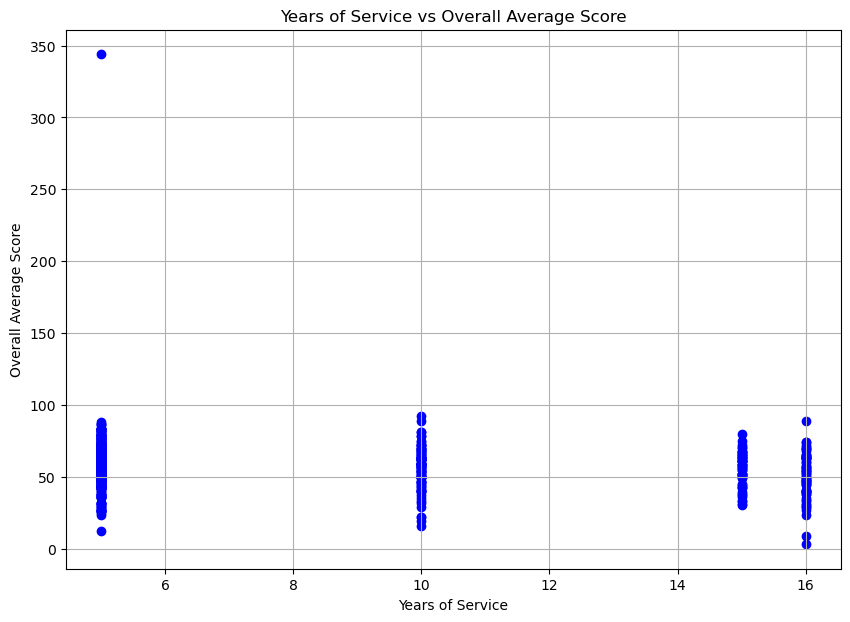

In [23]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Sample data
categories = burnout_df["Years of service?"]
values = burnout_df["Overall Average"]

# Calculate Pearson correlation coefficient and p-value
corr_coefficient, p_value = stats.pearsonr(categories, values)

# Create a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(categories, values, color="blue")
plt.title("Years of Service vs Overall Average Score")
plt.xlabel("Years of Service")
plt.ylabel("Overall Average Score")
plt.grid(True)

# Print the correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-Value: {p_value}")

# Show the plot
plt.show()

# (4.2) Remove the outlier
Removed outlier, then recreated graph to show a better representation of the distribution of this data set. Calculated a more accurate pvalue.

Pearson Correlation Coefficient: -0.16011580149747284
P-Value: 4.5313591737874485e-05


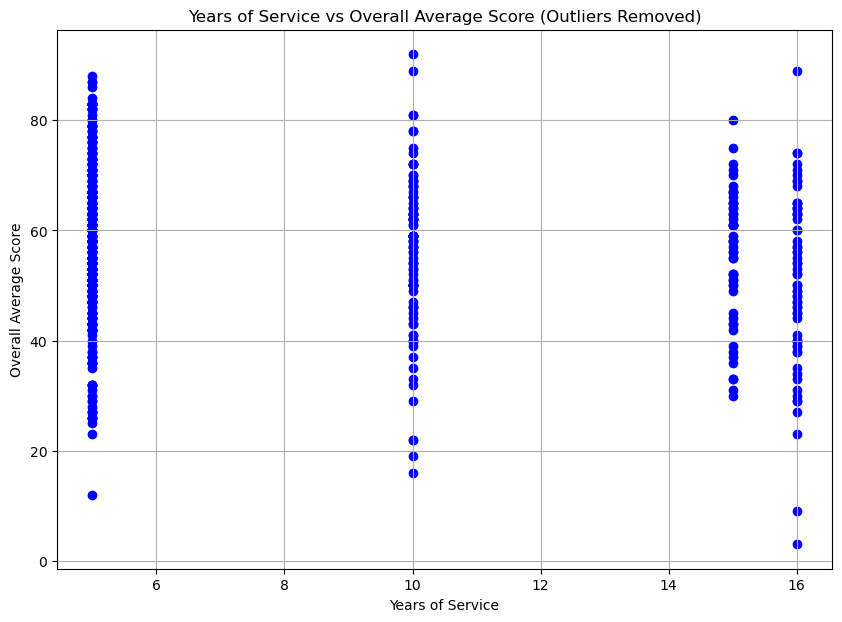

In [24]:
categories = burnout_df["Years of service?"]
values = burnout_df["Overall Average"]

# Identify and remove the outliers (where "Overall Average" > 300)
outlier_threshold = 300
filtered_df = burnout_df[burnout_df["Overall Average"] <= outlier_threshold]

# Calculate Pearson correlation coefficient and p-value with the outliers removed
corr_coefficient, p_value = stats.pearsonr(filtered_df["Years of service?"], filtered_df["Overall Average"])

# Create a scatter plot without the outliers
plt.figure(figsize=(10, 7))
plt.scatter(filtered_df["Years of service?"], filtered_df["Overall Average"], color="blue")
plt.title("Years of Service vs Overall Average Score (Outliers Removed)")
plt.xlabel("Years of Service")
plt.ylabel("Overall Average Score")
plt.grid(True)

# Print the correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-Value: {p_value}")

# Show the plot
plt.show()

### Description
In the bar plot below, it is now more visually representative of the data when comparing Years of Service and Overall Average Score.

## (4.3) Bar Graph of Years of Service vs Overall Average Score

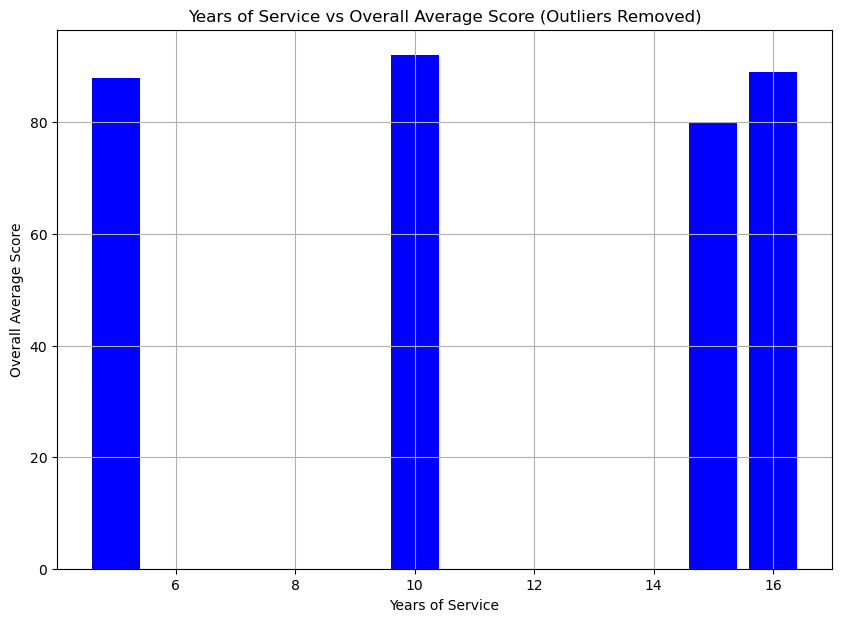

In [25]:
import matplotlib.pyplot as plt

# Filter the data to remove outliers (Overall Average > 300)
filtered_data = burnout_df[burnout_df["Overall Average"] <= 300]

# Extract the categories and values from the filtered data
categories = filtered_data["Years of service?"]
values = filtered_data["Overall Average"]

# Create a bar graph
plt.figure(figsize=(10, 7))
plt.bar(categories, values, color="blue")

plt.title("Years of Service vs Overall Average Score (Outliers Removed)")
plt.xlabel("Years of Service")
plt.ylabel("Overall Average Score")
plt.grid(True)

# Show the bar graph
plt.show()

# (4.4) Visualzing Distribution of The Overall Average Score and Years of Service
Using the filtered data to find the mean and standard deviation of how frequent we are seeing each individual average score. Due to the nature of the values being categorical, I created bar graphs to better understand and visualize the distribution of the data.

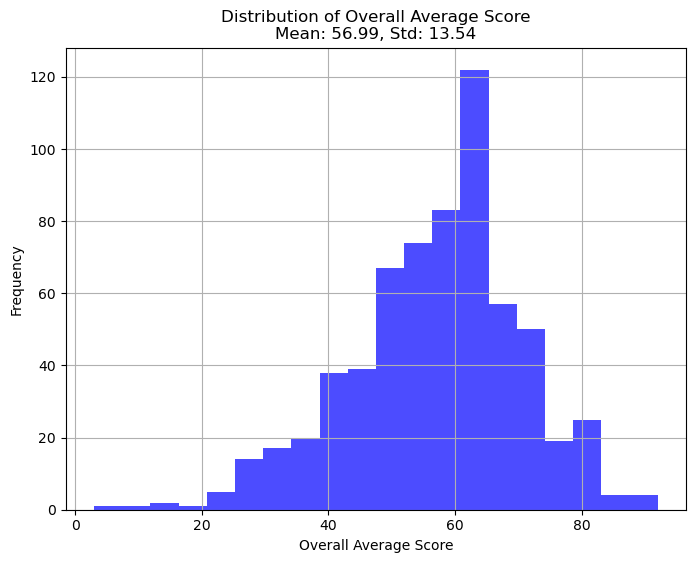

In [26]:
data = filtered_data["Overall Average"]

# Calculate mean and standard deviation
mean = data.mean()
std = data.std()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, color='blue', alpha=0.7)
plt.xlabel("Overall Average Score")
plt.ylabel("Frequency")
plt.title(f'Distribution of Overall Average Score\nMean: {mean:.2f}, Std: {std:.2f}')
plt.grid(True)
plt.show()

### Discription
This data set reflects a strong representation of people that are less seasoned healtchare workers.

##  (4.5) Distribution of Years of Service

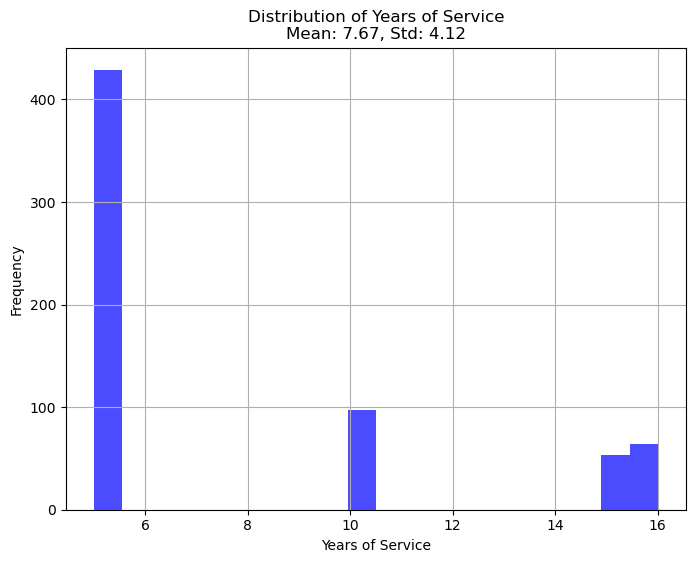

In [27]:
data = filtered_data["Years of service?"]

# Calculate mean and standard deviation
mean = data.mean()
std = data.std()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, color='blue', alpha=0.7)
plt.xlabel("Years of Service")
plt.ylabel("Frequency")
plt.title(f'Distribution of Years of Service\nMean: {mean:.2f}, Std: {std:.2f}')
plt.grid(True)
plt.show()

# (5) How do supportive measures affect burnout?
In this section we will analyze how supportive measures enacted by the workplace affects worker burnout. To do this we will start with selecting three "yes" or "no" questions the reflect the employers effort to support the healthcare worker. These questions are:

1. Was adequate PPE provided?
2. Was mental health support available?
3. Did you receive Covid 19 specific training?

An answer of "Yes" to any of these questions would imply greater workplace support of the healthcare worker, and an answer of "No" would imply the HCW was less supported by their workplace to handle the Covid-19 emergency. These questions will be referred to as "workplace support questions".

A functional dataframe is created that will be used through out this section.

In [28]:
support_df = burnout_df[['Designation',
                          'Adequate PPE provided?',
                          'Was mental health support available?',
                          'Received Covid 19 specific training?',
                          'Overall Average']]
support_df.head()

,Designation,Adequate PPE provided?,Was mental health support available?,Received Covid 19 specific training?,Overall Average
0,Nurse,Yes,Yes,No,51
1,Nurse,No,No,No,66
2,Nurse,Yes,Yes,Yes,68
3,Nurse,No needed,No,Yes,61
4,Nurse,No,No,No,50


## (5.1) This section will read through the data by occupation, collect the value in the "Average Score" column for each "yes" and "no" answer, and calculate the mean value for each workplace support question. 

In [29]:
# This section will read through the data by occupation and collect the value in the "Average Score" column for each 
# "yes" and "no" answer and calculate the mean value for each workplace support question. 
# The foundation for this code was generated by ChatGPT

designation_list = ["Nurse", "Doctor", "Physiotherapist", "Radiographers", "Supportive Staff"]
ppe_provided_list = ["Yes", "No"]
mental_health_list = ["Yes", "No"]
covid_training_list = ["Yes", "No"]

means = {} #an empty dictionary to hold the key and value for occupational averages for yes and no answers to each question.

# a loop with embedded loop to read through each designation and each acceptable answer to the three workplace support questions
# and calculate the averages of those value and add them to the means dictionary.
for designation in designation_list:
    for ppe_provided in ppe_provided_list:
        mean_value = support_df.loc[(support_df["Designation"] == designation) &
                                    (support_df["Adequate PPE provided?"] == ppe_provided), "Overall Average"].mean()
        key = f'q1_{designation.lower()}_{ppe_provided.lower()}_mean' #creates a unique key for each mean_value
        means[key] = mean_value #add the value found and key created to the means dictionary
        
    for mental_health in mental_health_list:
        mean_value = support_df.loc[(support_df["Designation"] == designation) &
                                    (support_df["Was mental health support available?"] == mental_health), "Overall Average"].mean()
        key = f'q2_{designation.lower()}_{mental_health.lower()}_mean'
        means[key] = mean_value
        
    for covid_training in covid_training_list:
        mean_value = support_df.loc[(support_df["Designation"] == designation) &
                                    (support_df["Received Covid 19 specific training?"] == covid_training), "Overall Average"].mean()
        key = f'q3_{designation.lower()}_{covid_training.lower()}_mean'
        means[key] = mean_value

In [30]:
means

{'q1_nurse_yes_mean': 59.184357541899445,
 'q1_nurse_no_mean': 62.46666666666667,
 'q2_nurse_yes_mean': 53.971014492753625,
 'q2_nurse_no_mean': 62.81730769230769,
 'q3_nurse_yes_mean': 58.97014925373134,
 'q3_nurse_no_mean': 59.291666666666664,
 'q1_doctor_yes_mean': 53.867924528301884,
 'q1_doctor_no_mean': 63.59090909090909,
 'q2_doctor_yes_mean': 49.925,
 'q2_doctor_no_mean': 57.84070796460177,
 'q3_doctor_yes_mean': 52.94827586206897,
 'q3_doctor_no_mean': 56.20161290322581,
 'q1_physiotherapist_yes_mean': 55.333333333333336,
 'q1_physiotherapist_no_mean': 73.0,
 'q2_physiotherapist_yes_mean': 50.142857142857146,
 'q2_physiotherapist_no_mean': 63.45454545454545,
 'q3_physiotherapist_yes_mean': 50.5,
 'q3_physiotherapist_no_mean': 59.09375,
 'q1_radiographers_yes_mean': 63.22727272727273,
 'q1_radiographers_no_mean': 81.0,
 'q2_radiographers_yes_mean': 67.6,
 'q2_radiographers_no_mean': 64.07142857142857,
 'q3_radiographers_yes_mean': 76.66666666666667,
 'q3_radiographers_no_mean':

## (5.2) Calculate the average for all three questions by occupation and answer.

In [31]:
# This section calculates the agregated average for all three questions by occupation and answer. 

nurse_yes_average = (means['q1_nurse_yes_mean'] + means['q2_nurse_yes_mean'] + means['q3_nurse_yes_mean']) / 3
nurse_no_average = (means['q1_nurse_no_mean'] + means['q2_nurse_no_mean'] + means['q3_nurse_no_mean']) / 3

doctor_yes_average = (means['q1_doctor_yes_mean'] + means['q2_doctor_yes_mean'] + means['q3_doctor_yes_mean']) / 3
doctor_no_average = (means['q1_doctor_no_mean'] + means['q2_doctor_no_mean'] + means['q3_doctor_no_mean']) / 3

physiotherapist_yes_average = (means['q1_physiotherapist_yes_mean'] + means['q2_physiotherapist_yes_mean'] +
                               means['q3_physiotherapist_yes_mean']) / 3
physiotherapist_no_average = (means['q1_physiotherapist_no_mean'] + means['q2_physiotherapist_no_mean'] +
                              means['q3_physiotherapist_no_mean']) / 3

radiographers_yes_average = (means['q1_radiographers_yes_mean'] + means['q2_radiographers_yes_mean'] +
                             means['q3_radiographers_yes_mean']) / 3
radiographers_no_average = (means['q1_radiographers_no_mean'] + means['q2_radiographers_no_mean'] +
                            means['q3_radiographers_no_mean']) / 3

supportstaff_yes_average = (means['q1_supportive staff_yes_mean'] + means['q2_supportive staff_yes_mean'] +
                            means['q3_supportive staff_yes_mean']) / 3
supportstaff_no_average = (means['q1_supportive staff_no_mean'] + means['q2_supportive staff_no_mean'] +
                           means['q3_supportive staff_no_mean']) / 3

## (5.3) Calculate average burnout score per Occupation

In [32]:
# This section caculated the average burnout score for each designation to be used as a baseline comparison
# against the average burnout scores for "yes" and "no" answers.

nurse_overall = support_df.loc[(support_df["Designation"] == "Nurse")]["Overall Average"].mean()
doctor_overall = support_df.loc[(support_df["Designation"] == "Doctor")]["Overall Average"].mean()
physiotherapist_overall = support_df.loc[(support_df["Designation"] == "Physiotherapist")]["Overall Average"].mean()
radiographers_overall = support_df.loc[(support_df["Designation"] == "Radiographers")]["Overall Average"].mean()
supportstaff_overall = support_df.loc[(support_df["Designation"] == "Supportive Staff")]["Overall Average"].mean()

## (5.4) Creating a grouped bar graph

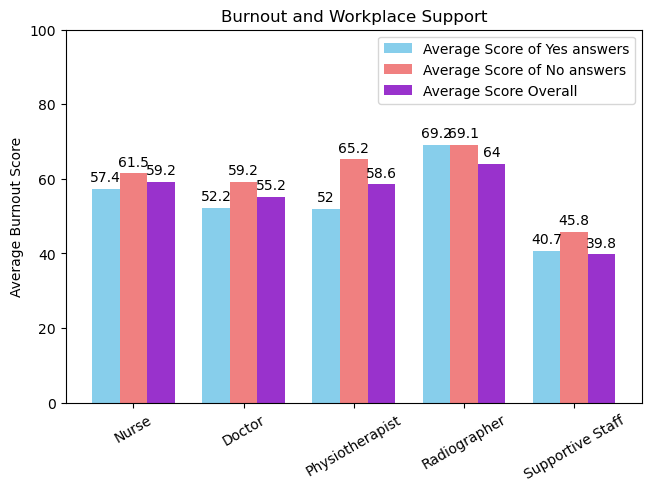

In [43]:
# Creating a grouped bar graph to visualize the average burnout score of those who answered "Yes" or "No" to 
# the workplace support questions, and compared against the overall average burnout score of each occupation.
# This code is based on a matplotlib example: 
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

hcws = ("Nurse", "Doctor", "Physiotherapist", "Radiographer", "Supportive Staff")
hcw_means = {
    'Average Score of Yes answers': (round(nurse_yes_average,1), round(doctor_yes_average,1), round(physiotherapist_yes_average,1),
            round(radiographers_yes_average,1), round(supportstaff_yes_average,1)),
    'Average Score of No answers': (round(nurse_no_average,1), round(doctor_no_average,1), round(physiotherapist_no_average,1),
           round(radiographers_no_average,1), round(supportstaff_no_average,1)),
    'Average Score Overall': (round(nurse_overall,1), round(doctor_overall,1), round(physiotherapist_overall,1),
                round(radiographers_overall,1), round(supportstaff_overall,1))
}

colors = ['skyblue', 'lightcoral', 'darkorchid']

x = np.arange(len(hcws)) # how many groups there will be and where the labels will go
width = 0.25  # the width of the bars
multiplier = 0 # this is going to separate the groups

fig, ax = plt.subplots(layout='constrained') #layout='constrained' to prevent overlapping labels

for key, value in hcw_means.items():
    offset = width * multiplier
    bar_values = ax.bar(x + offset, value, width, label=key, color=colors[multiplier])
    ax.bar_label(bar_values, padding=3)
    multiplier += 1
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Burnout Score')
ax.set_title('Burnout and Workplace Support')
ax.set_xticks(x + width, hcws, rotation=30)
ax.legend(loc='best', ncols=1)
ax.set_ylim(0, 100)


plt.show()

# Burnout and Workplace Support Grouped bar graph
### Description and Analysis
From the data displayed in the graph above, it appears that those who answered "Yes" to any of the three questions had a lower burnout score than those who answered "No" to any of the questions. This implies that employer support in the form of adequate PPE, mental health support, and Covid-19 specific training will result in lower burnout among healthcare workers. With the notable exception of "Radiographer" which showed nearly identical burnout scores for those who answered "Yes" or "No" to the workplace support questions. This also shows Radiographers to be the most burntout overall.

## ------------------------------------------------------------------------------------------------------

## (5.5) Collecting the counts of "Yes" and "No" reponses by Occupation 

In [34]:
designation_list = ["Nurse", "Doctor", "Physiotherapist", "Radiographers", "Supportive Staff"]
ppe_provided_list = ["Yes", "No"]
mental_health_list = ["Yes", "No"]
covid_training_list = ["Yes", "No"]

counts = {} #an empty dictionary to hold the counts of 'yes' and 'no' responses

for designation in designation_list:
    for ppe_provided in ppe_provided_list:
        # isolate the 'yes' and 'no' responses by occupation
        count_value = support_df.loc[(support_df["Designation"] == designation) &
                                    (support_df["Adequate PPE provided?"] == ppe_provided)] 
        sum_count = len(count_value) # count the number of responses
        key = f'q1_{designation.lower()}_{ppe_provided.lower()}_count' #create a unique key for each count
        counts[key] = sum_count
        
    for mental_health in mental_health_list:
        count_value = support_df.loc[(support_df["Designation"] == designation) &
                                    (support_df["Was mental health support available?"] == mental_health)]
        sum_count = len(count_value)
        key = f'q2_{designation.lower()}_{mental_health.lower()}_count'
        counts[key] = sum_count
        
    for covid_training in covid_training_list:
        count_value = support_df.loc[(support_df["Designation"] == designation) &
                                    (support_df["Received Covid 19 specific training?"] == covid_training)]
        sum_count = len(count_value)
        key = f'q3_{designation.lower()}_{covid_training.lower()}_count'
        counts[key] = sum_count

## (5.6) Create dataframes for each occupation to hold counts

In [35]:
nurse_df = pd.DataFrame({'Yes': [counts['q1_nurse_yes_count'],
                                 counts['q2_nurse_yes_count'],
                                 counts['q3_nurse_yes_count']],
                         'No': [counts['q1_nurse_no_count'],
                                counts['q2_nurse_no_count'],
                                counts['q3_nurse_no_count']],
                         'Questions': ['Adequate PPE provided?',
                                       'Was mental health support available?',
                                       'Received Covid 19 specific training?']})
nurse_df = nurse_df.set_index('Questions')

doctor_df = pd.DataFrame({'Yes': [counts['q1_doctor_yes_count'],
                                 counts['q2_doctor_yes_count'],
                                 counts['q3_doctor_yes_count']],
                         'No': [counts['q1_doctor_no_count'],
                                counts['q2_doctor_no_count'],
                                counts['q3_doctor_no_count']],
                         'Questions': ['Adequate PPE provided?',
                                       'Was mental health support available?',
                                       'Received Covid 19 specific training?']})
doctor_df = doctor_df.set_index('Questions')

physiotherapist_df = pd.DataFrame({'Yes': [counts['q1_physiotherapist_yes_count'],
                                 counts['q2_physiotherapist_yes_count'],
                                 counts['q3_physiotherapist_yes_count']],
                         'No': [counts['q1_physiotherapist_no_count'],
                                counts['q2_physiotherapist_no_count'],
                                counts['q3_physiotherapist_no_count']],
                         'Questions': ['Adequate PPE provided?',
                                       'Was mental health support available?',
                                       'Received Covid 19 specific training?']})
physiotherapist_df = physiotherapist_df.set_index('Questions')

radiographers_df = pd.DataFrame({'Yes': [counts['q1_radiographers_yes_count'],
                                 counts['q2_radiographers_yes_count'],
                                 counts['q3_radiographers_yes_count']],
                         'No': [counts['q1_radiographers_no_count'],
                                counts['q2_radiographers_no_count'],
                                counts['q3_radiographers_no_count']],
                         'Questions': ['Adequate PPE provided?',
                                       'Was mental health support available?',
                                       'Received Covid 19 specific training?']
                        })
radiographers_df = radiographers_df.set_index('Questions')

## (5.7) Create pie charts to visualize total "yes" and "no" reponses to support questions 

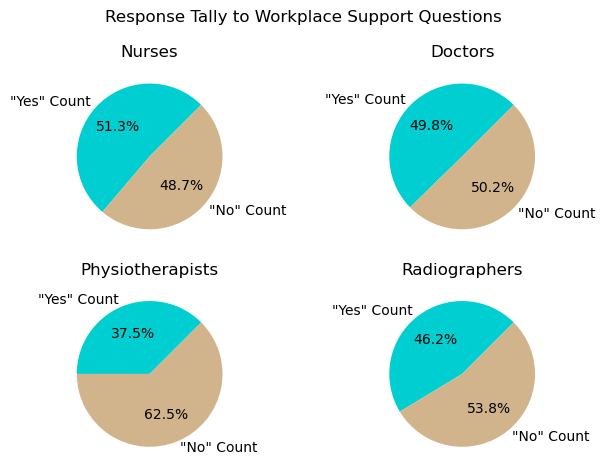

In [36]:
labels = '"Yes" Count', '"No" Count'
colors = ['darkturquoise', 'tan']

nurses = [nurse_df['Yes'].sum(), nurse_df['No'].sum()] # add together the 'yes' and 'no' responses of each question to get total
doctors = [doctor_df['Yes'].sum(), doctor_df['No'].sum()]
physiotherapists = [physiotherapist_df['Yes'].sum(), physiotherapist_df['No'].sum()]
radiographers = [radiographers_df['Yes'].sum(), radiographers_df['No'].sum()]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.pie(nurses, labels=labels, autopct='%1.1f%%', colors=colors, startangle=45)
ax1.title.set_text('Nurses')
ax2.pie(doctors, labels=labels, autopct='%1.1f%%', colors=colors, startangle=45)
ax2.title.set_text('Doctors')
ax3.pie(physiotherapists, labels=labels, autopct='%1.1f%%', colors=colors, startangle=45)
ax3.title.set_text('Physiotherapists')
ax4.pie(radiographers, labels=labels, autopct='%1.1f%%', colors=colors, startangle=45)
ax4.title.set_text('Radiographers')
fig.suptitle('Response Tally to Workplace Support Questions')
plt.tight_layout()

### Description
Nurses responded with 51.3% "yes" and 48.7% "no" to the survey questions. Doctors responded 49.8% yes and 50.2% no. Physiotherapists responded 37.5% yes and 62.5% no. And Radiographers responded 46.2% yes and 53.8% no. Physiotherapists appear to have recieved the least amount of support by their employers. 

# Conclusion

In conclusion, the investigation into healthcare worker burnout during the Covid-19 pandemic has uncovered multifaceted insights. Prior to the pandemic, burnout among healthcare professionals was already deemed a crisis. And our analysis sought to understand how the pandemic impacted these rates

Our data revealed that burnout is prevalent across various healthcare occupations and demographics, with nurses representing the largest portion of affected workers. The overwhelming female majority within the workforce suggest potential gender related implications in the experience of burnout. Both male and female healthcare workers reported similar levels of burnout, indicating that stressors are not necessarily gender specific.

Different occupations experienced burnout to varying degrees, with radiographers showing high levels of work-related stress, while support staff appeared to have lower burnout rates. However, its crucial to note that the higher median performance score of radiographers, despite their high burnout levels, might reflect a complex relationship between stress and performance. 

Emotional stress, particularly the fear of family members contracting the virus due to workplace exposure, emerged as a significant factor contributing to burnout, alongside the physical and emotional demands of pandemic related workload and perceived lack of support. The lower rates of concern for substance abuse, the sense of fulfillment, and the strong camaraderie highlighted some of the protective factors in the healthcare industry. 

Moreover, workplace support in the form of adequate PPE, mental health services, and Covid-19 specific training was shown to be instrumental in mitigating burnout levels. Employees with access to these support measures reported lower levels of burnout, emphasizing the importance of organization support during the crises.

The notable exception to these finding was radiographers, who experienced high levels of burnout, suggest there may be occupation specific stressor that are not as effectively alleviated by general support initiatives. 

Overall, the findings underscore the need for targeted support strategies that address both emotional and occupational demands of healthcare workers, especially during times of crisis. Such strategies could potentially include enhancing emotional support programs, work-life balance initiatives, and ensuring that the environment and workload are manageable to maintain a resilient healthcare workforce.
